<a href="https://www.analytiksinc.com">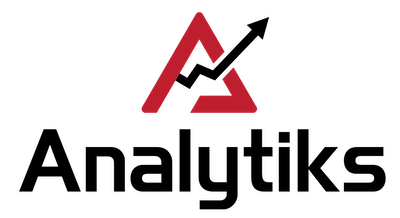</a>
<p style="text-align: right;"> © 2019. Analytiks Inc. </p>

# DECISION TREE

## Import Libraries

### Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

### Additional Libraries

In [2]:
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split

## Load and Explore the Dataset

<a href="https://archive.ics.uci.edu/ml/datasets/Lymphography">**Lymphography Dataset**</a>

In [3]:
#Provide the path of the dataset
df = pd.read_csv("lymphography.csv")

In [12]:
#Check if the dataset loaded correctly
df.head(10)

,lymphatics,block of affere,bl of lymph c,bl of lymph s,by pass,extravasates,regeneration of,early uptake in,lym nodes dimin,lym nodes enlar,changes in lym,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no of nodes in,class
0,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2,3
1,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2,2
2,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7,3
3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6,3
4,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1,2
5,2,1,1,1,1,1,1,2,1,3,3,3,3,6,3,1,2,4,2
6,2,2,1,1,1,1,1,2,1,2,3,2,3,8,2,1,1,1,2
7,3,2,1,1,1,2,1,2,1,2,2,2,2,1,3,1,1,1,2
8,2,2,1,1,1,1,1,2,1,3,2,2,2,8,3,1,2,5,3
9,2,1,1,1,1,1,1,2,1,2,2,3,3,5,3,1,1,2,3


In [5]:
#Assess the dataset using .describe() function
df.describe(include="all")

,lymphatics,block of affere,bl of lymph c,bl of lymph s,by pass,extravasates,regeneration of,early uptake in,lym nodes dimin,lym nodes enlar,changes in lym,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no of nodes in,class
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2.743243,1.554054,1.175676,1.047297,1.243243,1.506757,1.067568,1.702703,1.060811,2.472973,2.398649,2.966216,2.804054,5.216216,2.331081,1.662162,1.790541,2.601351,2.452703
std,0.817509,0.498757,0.381836,0.212995,0.430498,0.501652,0.251855,0.458621,0.313557,0.836627,0.568323,0.868305,0.761834,2.171368,0.777126,0.474579,0.408305,1.905023,0.575396
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000,2.000000
50%,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000,3.000000
max,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,2.000000,2.000000,8.000000,4.000000


In [6]:
#Check the number of features and observations in the dataset
df.shape

(148, 19)

In [7]:
#Check the number of classes we have
df["class"].value_counts()

2    81
3    61
4     4
1     2
Name: class, dtype: int64

## Build the Model

In [8]:
#Split the features and the target column.
X = df.drop(["class"], axis=1)
y = df["class"]

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
clf = tree.DecisionTreeClassifier(criterion="gini", min_samples_split=4, min_samples_leaf=5,
            max_depth=10, random_state=25)

In [30]:
print(np.mean(cross_val_score(clf,X,y,cv=5)))

0.7153694581280788


C:\Users\COBENA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [9]:
#Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

In [10]:
#Check shape to make sure it is all in order
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((111, 18), (37, 18), (111,), (37,))

### Train the Model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">**Decision Tree Classifier**</a>

In [11]:
#Instantiate the Algorithm
clf = tree.DecisionTreeClassifier(criterion="gini", min_samples_split=4, min_samples_leaf=5,
            max_depth=10, random_state=25)

#Train the model
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='best')

## Validate the Model

In [13]:
y_pred = clf.predict(X_test)

In [14]:
#Check the performance metrics
print("{:.2f}".format(metrics.accuracy_score(y_test,y_pred)))

0.86


In [15]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, y_pred)))

Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='best'):
              precision    recall  f1-score   support

           2       0.81      0.94      0.87        18
           3       0.94      0.79      0.86        19

   micro avg       0.86      0.86      0.86        37
   macro avg       0.87      0.87      0.86        37
weighted avg       0.88      0.86      0.86        37




In [16]:
print("Confusion Matrix: \n%s" % metrics.confusion_matrix(y_test,y_pred))

Confusion Matrix: 
[[17  1]
 [ 4 15]]


In [17]:
#Encode Confusion Matrix into a DataFrame
labels = list(y_test.unique())
cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,index=labels, columns=labels)
cm_df

,2,3
2,17,1
3,4,15


## Advanced Functions

### Feature Importance 

For evaluating the importance of features on classification task.

In [18]:
#Extract the feature importance
f_importance = clf.feature_importances_

In [19]:
#Put into a DataFrame along with Feature Names for easier understanding.
f_list = X_train.columns
df_feature_importance = pd.DataFrame(f_importance, index=f_list, columns=["Importance"])

In [21]:
#Sort the values in Descending order (Most Important -> Least Important)
df_feature_importance.sort_values(["Importance"],ascending=False)

,Importance
block of affere,0.296229
special forms,0.217180
early uptake in,0.197226
no of nodes in,0.174380
changes in stru,0.085804
changes in lym,0.029181
exclusion of no,0.000000
dislocation of,0.000000
changes in node,0.000000
defect in node,0.000000


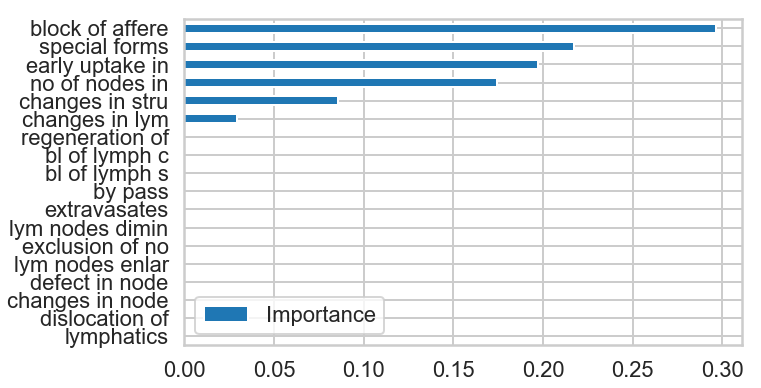

In [24]:
#Visualize importance using a plot, values should be ascending for plotting purposes
df_feature_importance_asc = df_feature_importance.sort_values(["Importance"])
df_feature_importance_asc.plot(kind='barh', figsize=(10,6))
#sns.barplot()

### Visualize the Decision Tree

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
#Get the feature/attribute columns
feature_col = X_train.columns
print (feature_col)

In [ ]:
#Get the class column columns
class_col = pd.unique(y_train)
class_col = np.array(class_col)
class_col = str(class_col).replace(" ", "")
print (type(class_col),class_col)

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=feature_col,
               class_names=class_col)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())